In [6]:
### Author Contributions 
### Aswini Shilpha S S - Data Analysis for all Categories mentioned in the below 
### Aswini Shilpha S S - Visualizations for all Categories  
### Aswini Shilpha S S - Visualizations of the  Machine Learning Algorithms Results and Metrics.

In [1]:
from io import BytesIO
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import os
import pandas as pd
import numpy as np
import geopandas as gpd

In [8]:
## Parquet File post Data Cleaning and Preprocessing in Scala and Maven. 
## Using Python for Visualization as not many libraries were present in Scala to visualize many Graphs, Boxplots, Heatmats and Piecharts. 
## Restored_df is the Dataframe having the data post Cleaning and Preprocessing to implement Data Analysis and Visualization to get more insights using various attributes.

restored_df = pd.read_parquet('parquet2.parquet')



In [9]:

# Assuming 'Weather_Timestamp' is the timestamp column in your DataFrame
restored_df['Weather_Timestamp'] = pd.to_datetime(restored_df['Weather_Timestamp'])

# Extract year, month, day, hour, and minute
restored_df['Year'] = restored_df['Weather_Timestamp'].dt.year
restored_df['Month'] = restored_df['Weather_Timestamp'].dt.month
restored_df['Day'] = restored_df['Weather_Timestamp'].dt.day
restored_df['Hour'] = restored_df['Weather_Timestamp'].dt.hour
restored_df['Minute'] = restored_df['Weather_Timestamp'].dt.minute

# Display the result
print(restored_df[['Weather_Timestamp', 'Year', 'Month', 'Day', 'Hour', 'Minute']].head())

    Weather_Timestamp  Year  Month  Day  Hour  Minute
0 2016-02-08 16:28:00  2016      2    8    16      28
1 2016-02-11 15:58:00  2016      2   11    15      58
2 2016-06-23 17:46:00  2016      6   23    17      46
3 2017-01-06 23:53:00  2017      1    6    23      53
4 2016-04-05 22:53:00  2016      4    5    22      53


# STATE WISE ACCIDENTS 

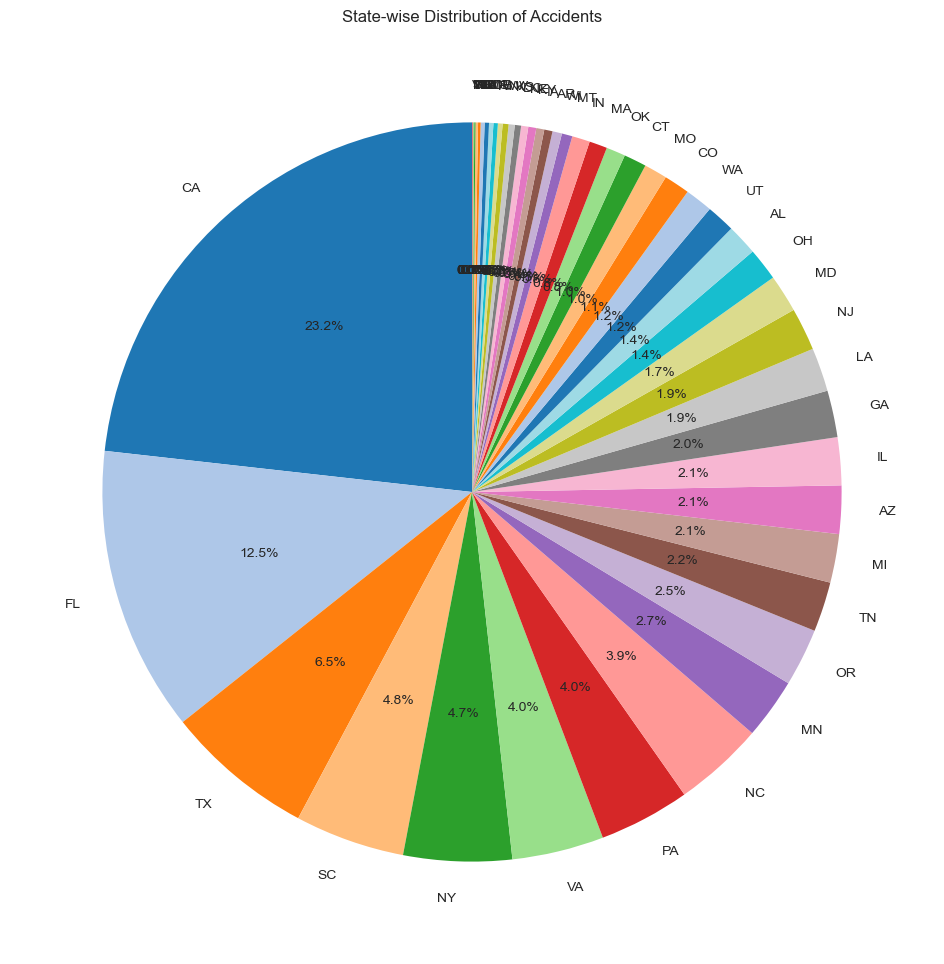

In [10]:
## State wise Accidents Percentage 

# Assuming 'State' is the column containing state information in your DataFrame
state_counts = restored_df['State'].value_counts()

# Use a Seaborn color palette
custom_palette = sns.color_palette("tab20", len(state_counts))

# Create a pie chart with a different color palette
plt.figure(figsize=(12, 12))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90, colors=custom_palette)
plt.title('State-wise Distribution of Accidents')
plt.show()


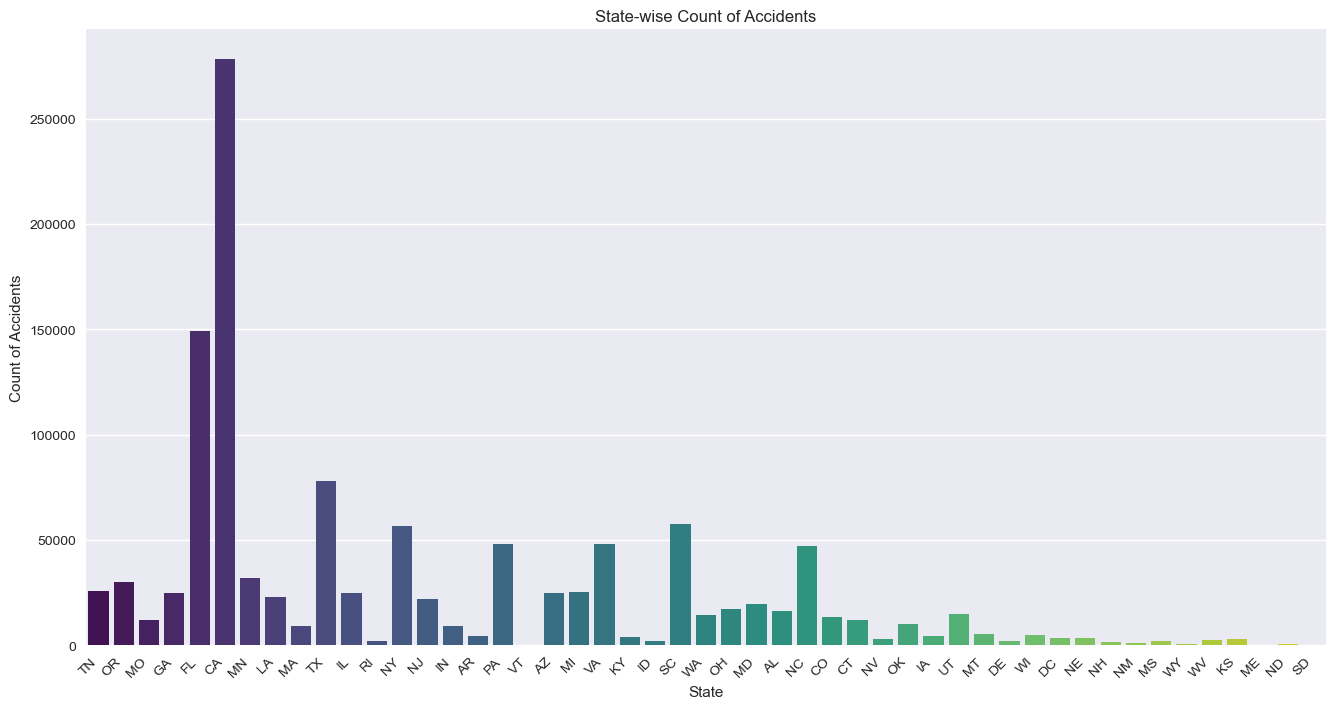

In [11]:
## State wise Accidents Count

## Sampling data for better performance 
sampled_df = restored_df.sample(frac=0.2)

# Create a bar plot for the count of accidents for each state
plt.figure(figsize=(16, 8))
sns.countplot(x='State', data=sampled_df, palette='viridis')
plt.title('State-wise Count of Accidents')
plt.xlabel('State')
plt.ylabel('Count of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()


# Data Analysis on Top 3 States with most Accidents 

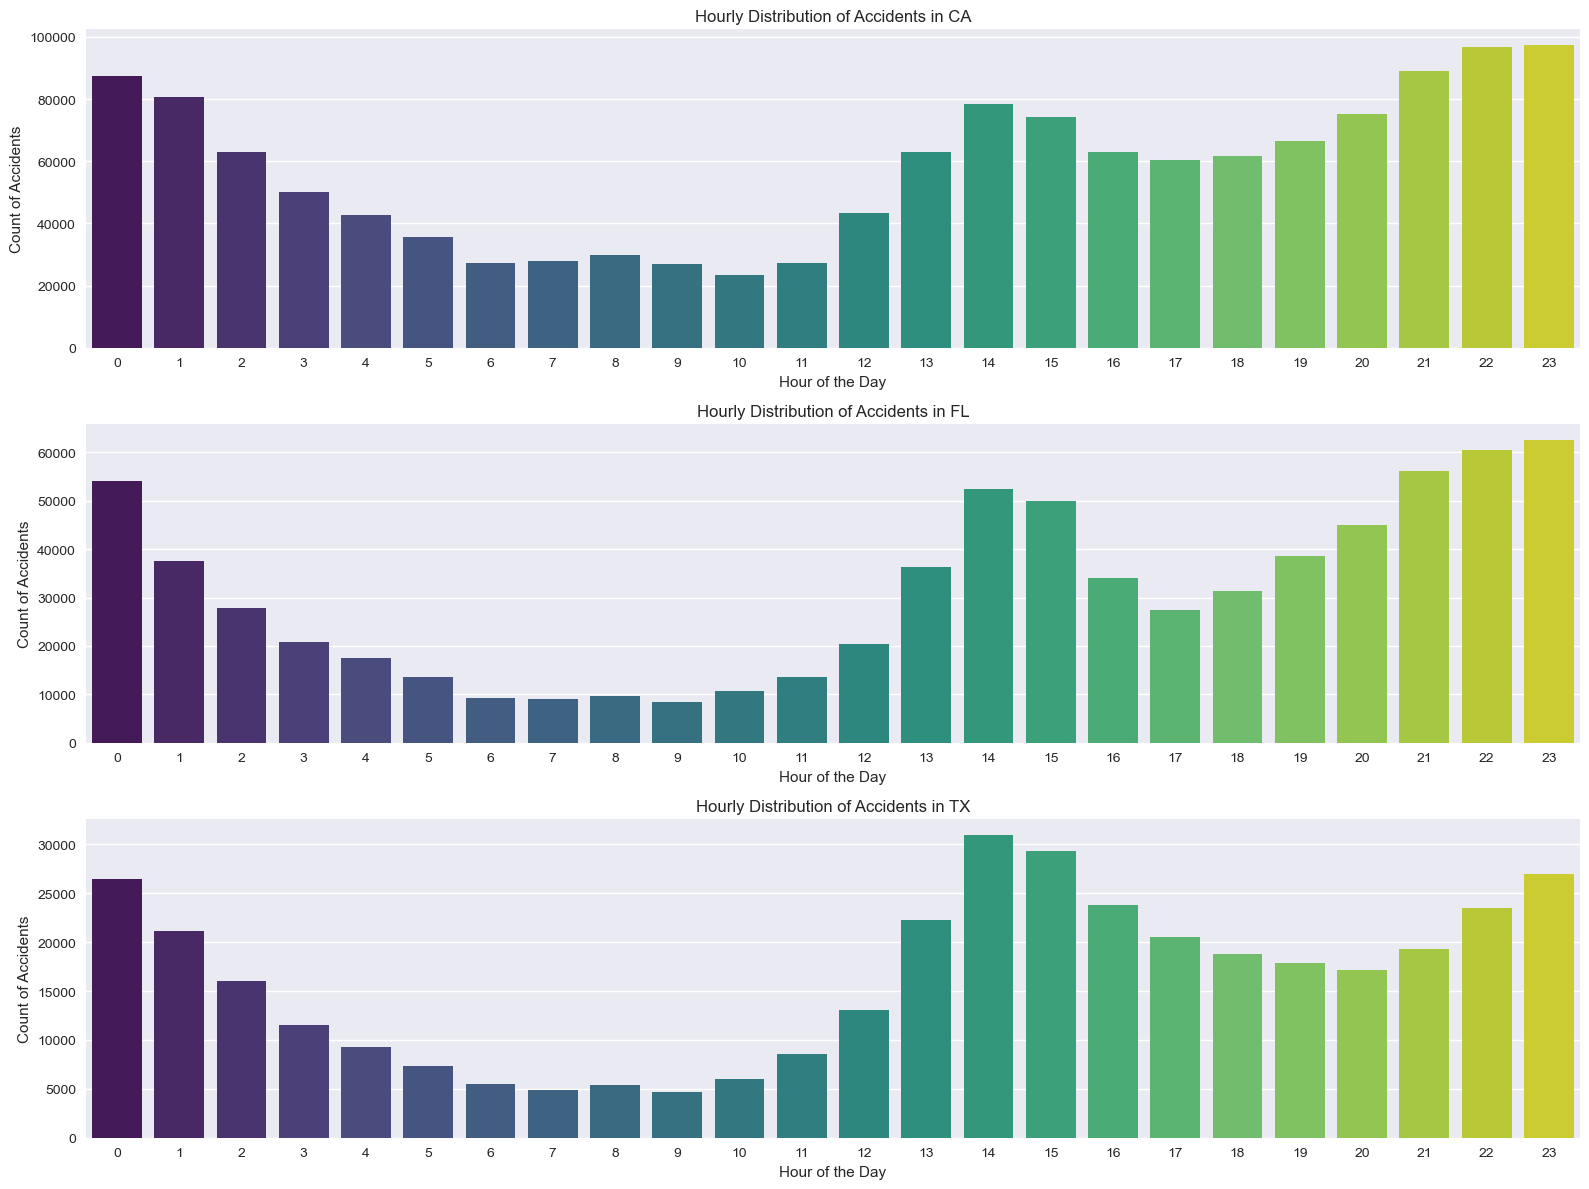

In [12]:
## Top 3 States Accidents Count at Hourly Level 

## Extracting Hour from Weather_Timestamp column
restored_df['Hour'] = restored_df['Weather_Timestamp'].dt.hour

# Top 3 states based on the total count of accidents
top_states = restored_df['State'].value_counts().nlargest(3).index

# Creating separate bar plots for the count of accidents at an hourly level for each of the top 3 states
plt.figure(figsize=(16, 12))

for i, state in enumerate(top_states, 1):
    plt.subplot(3, 1, i)
    state_df = restored_df[restored_df['State'] == state]
    sns.countplot(x='Hour', data=state_df, palette='viridis')
    plt.title(f'Hourly Distribution of Accidents in {state}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Count of Accidents')

plt.tight_layout()
plt.show()


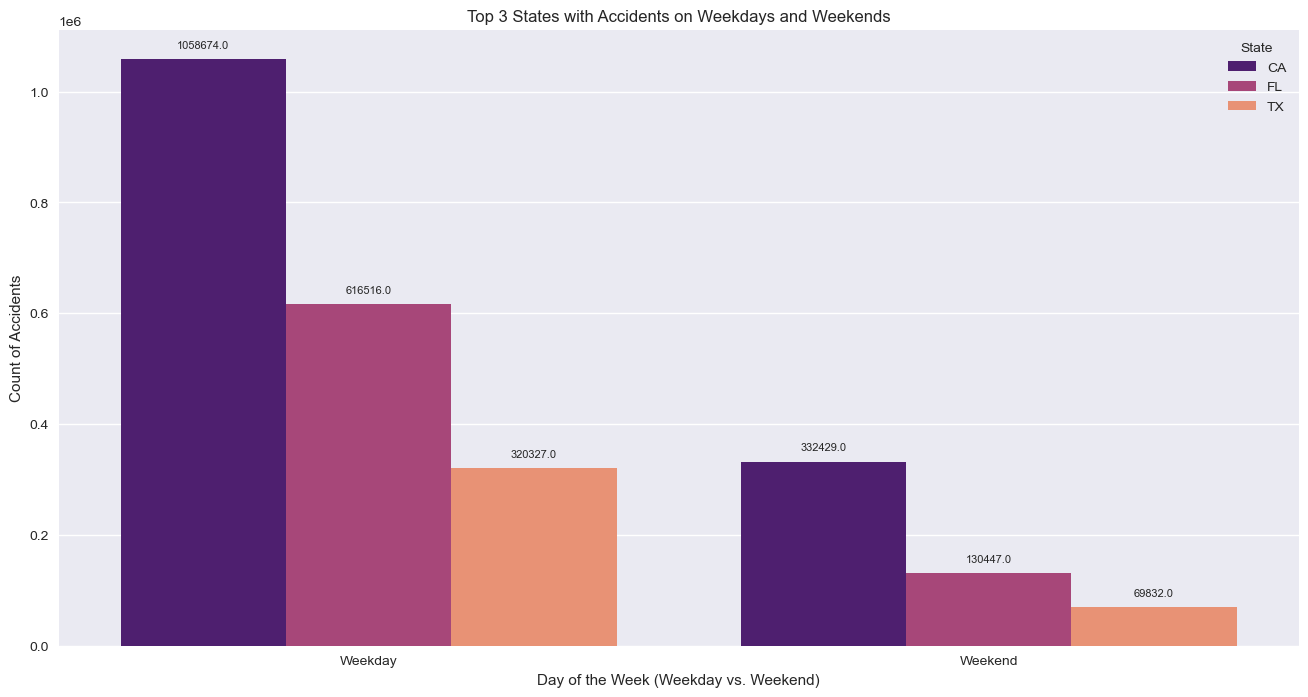

In [13]:
## Top 3 States Accidents Count by Severity comparing Weekends over Weekdays

# 'Weather_Timestamp' is already in datetime format
## Extraction of Day of the week such as weekday or weekend 

restored_df['DayOfWeek'] = restored_df['Weather_Timestamp'].dt.dayofweek
restored_df['IsWeekend'] = restored_df['DayOfWeek'].isin([5, 6])  # 5 and 6 correspond to Saturday and Sunday

# Get the top 3 states based on the total count of accidents
top_states = restored_df['State'].value_counts().nlargest(3).index

# Filter the DataFrame for the top 3 states
top_states_df = restored_df[restored_df['State'].isin(top_states)]

# Create a bar plot for the count of accidents for each state on weekdays and weekends
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='IsWeekend', hue='State', data=top_states_df, palette='magma')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Top 3 States with Accidents on Weekdays and Weekends')
plt.xlabel('Day of the Week (Weekday vs. Weekend)')
plt.ylabel('Count of Accidents')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

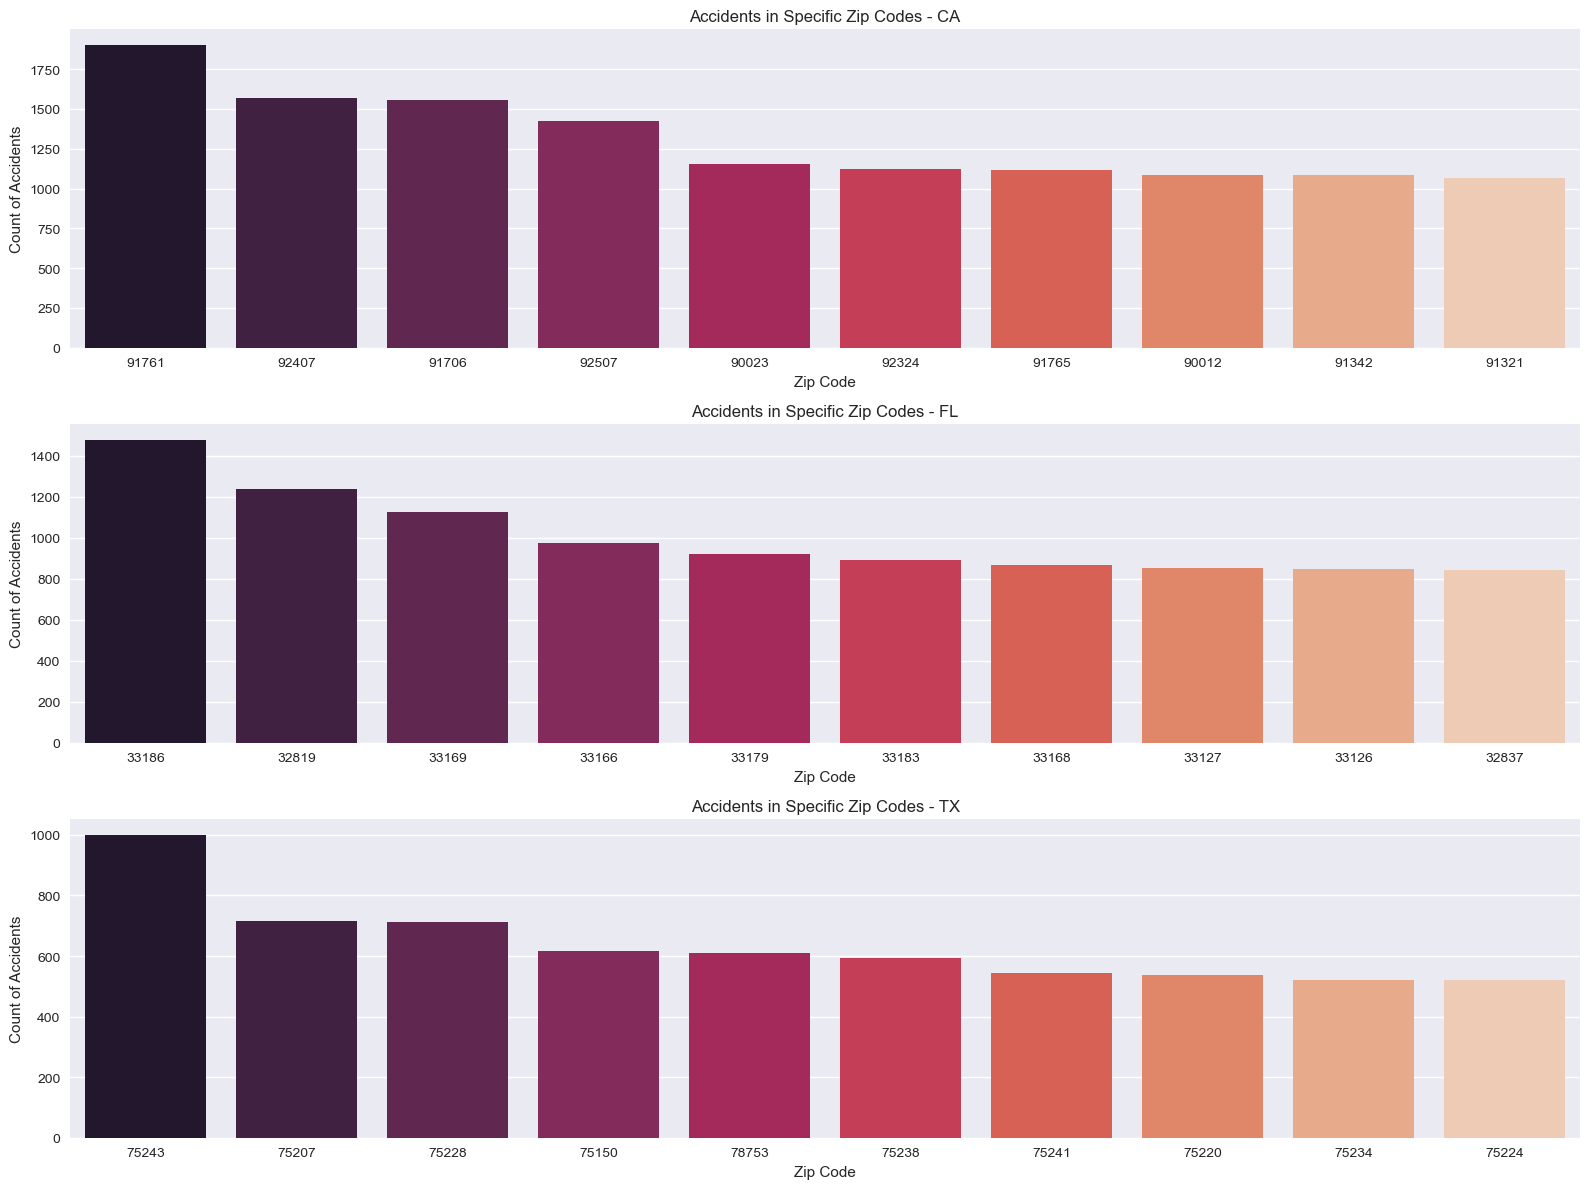

In [14]:
## Top 3 states with the accidents most occurring in 10 Zip Codes 


# To improve the performance, sampling the data.
sampled_df = restored_df.sample(frac=0.2)

# Top 3 states based on the total count of accidents
top_states = sampled_df['State'].value_counts().nlargest(3).index

# Creating separate bar plots for the count of accidents in specific zip codes for each of the top 3 states
plt.figure(figsize=(16, 12))

for i, state in enumerate(top_states, 1):
    plt.subplot(3, 1, i)
    state_df = sampled_df[sampled_df['State'] == state]
    sns.countplot(x='Zipcode', data=state_df, palette='rocket', order=state_df['Zipcode'].value_counts().index[:10])  # Display top 10 zip codes for better visibility
    plt.title(f'Accidents in Specific Zip Codes - {state}')
    plt.xlabel('Zip Code')
    plt.ylabel('Count of Accidents')

plt.tight_layout()
plt.show()

# Impact of Weather Attributes on Accident Severity

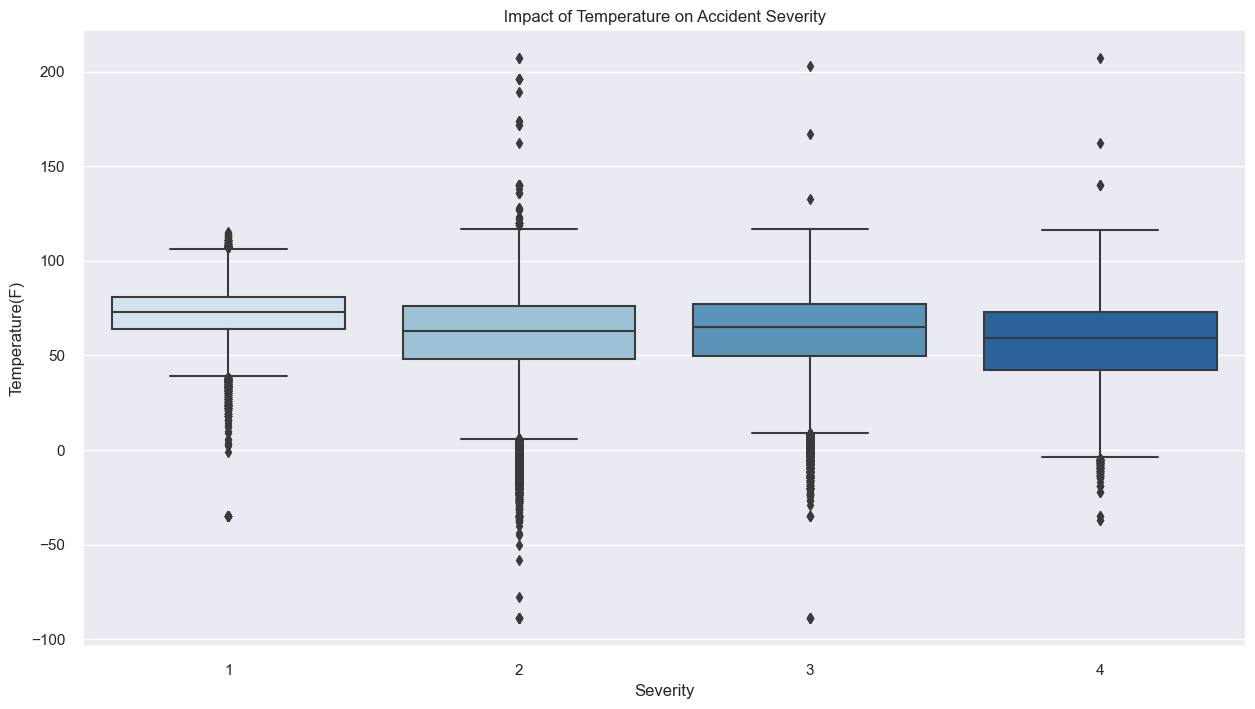

In [15]:
## Impact of Temperature on Accident Severity 


sns.set(style="darkgrid")
sns.boxplot(x="Severity", y="Temperature(F)", data=restored_df, palette="Blues")
plt.title(' Impact of Temperature on Accident Severity ')
plt.show()

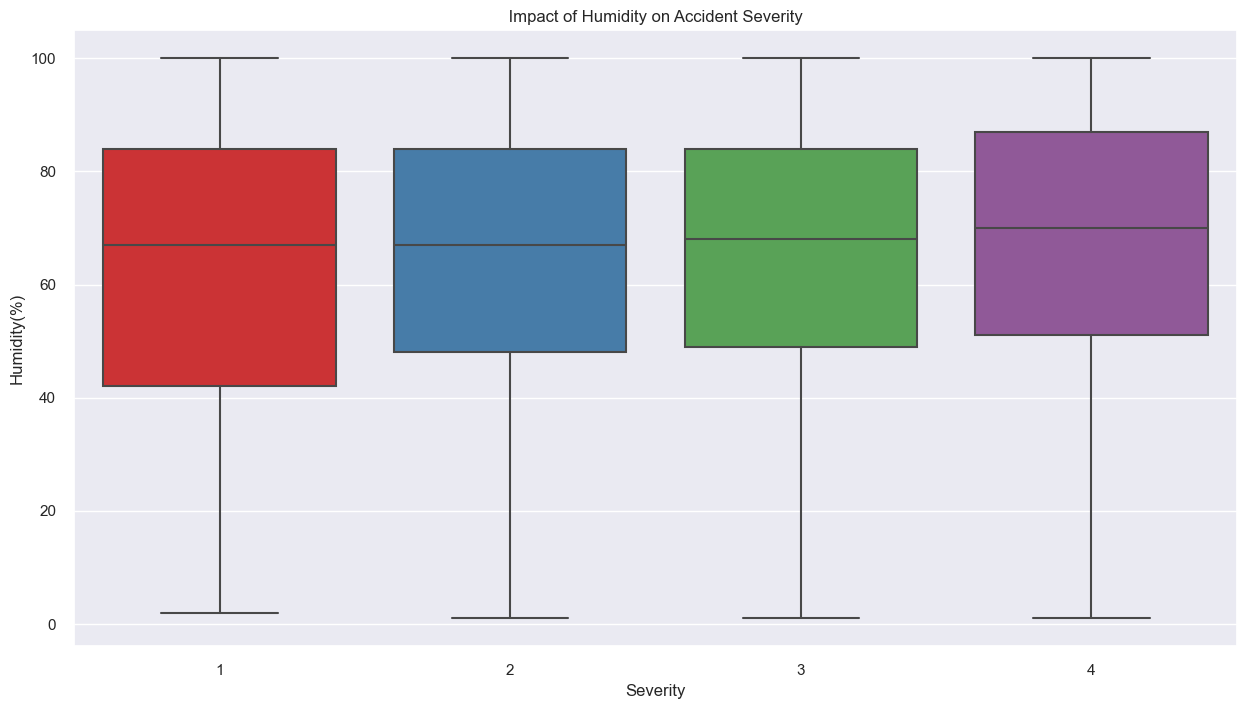

In [16]:
## Impact of Humidity on Accident Severity 


sns.set(style="darkgrid")
sns.boxplot(x="Severity", y="Humidity(%)", data=restored_df, palette="Set1")
plt.title(' Impact of Humidity on Accident Severity ')
plt.show()

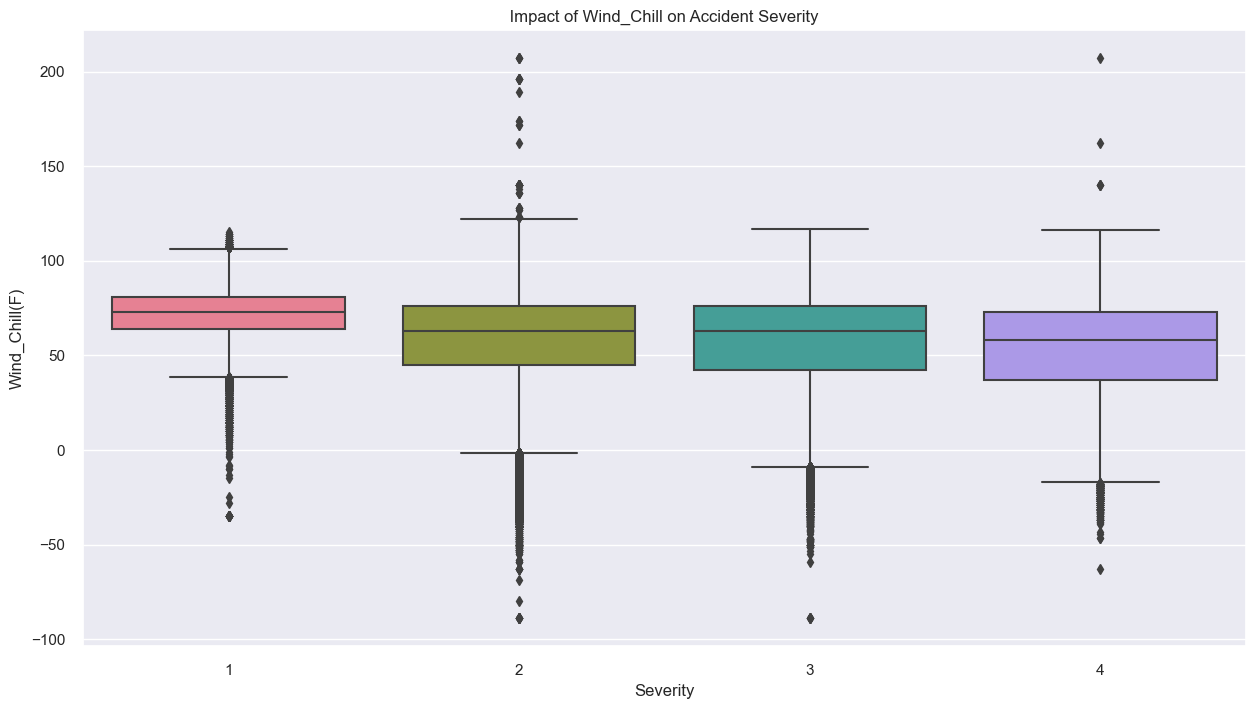

In [17]:
## Impact of Wind_chill on Accident Severity 


sns.set(style="darkgrid")
sns.boxplot(x="Severity", y="Wind_Chill(F)", data=restored_df, palette="husl")
plt.title(' Impact of Wind_Chill on Accident Severity ')
plt.show()

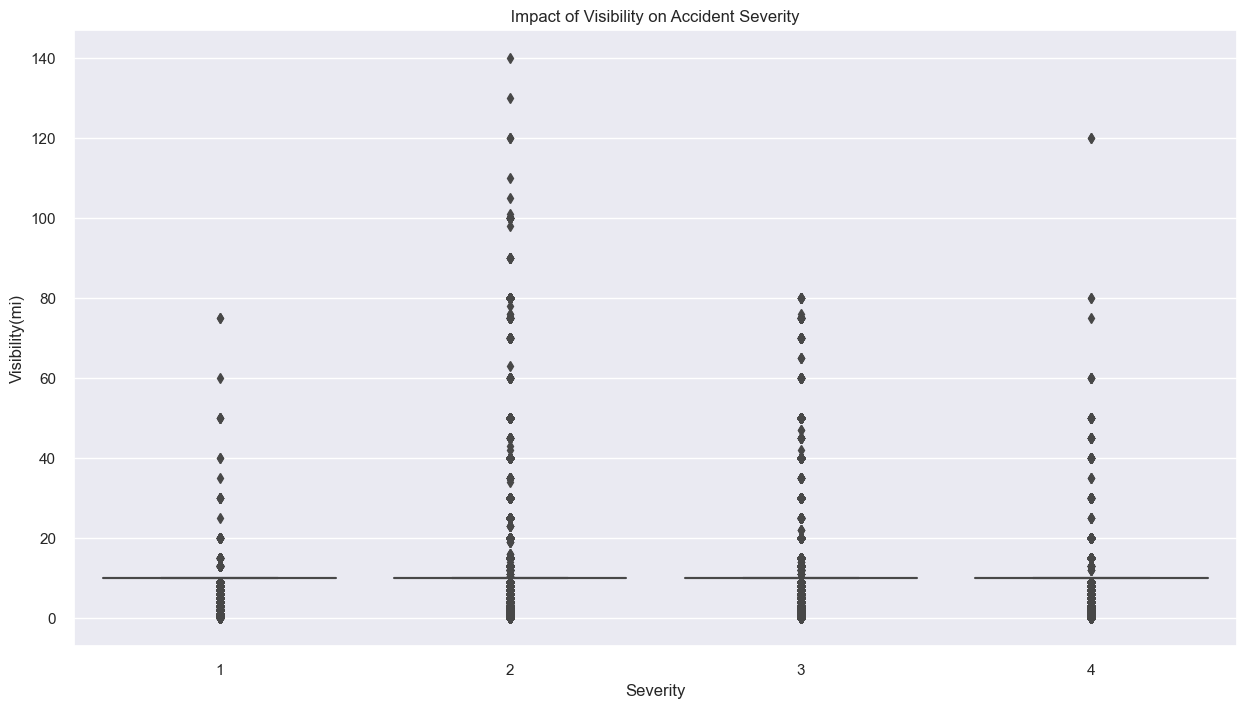

In [18]:
## Impact of Visibility on Accident Severity 


sns.set(style="darkgrid")
#sns.boxplot(x="Severity", y="Visibility(mi)", data=restored_df, palette="Set1")
sns.boxplot(x="Severity", y="Visibility(mi)", data=restored_df, palette="Set1")
plt.title(' Impact of Visibility on Accident Severity ')
plt.show()

# TEMPORAL IMPACTS ON ACCIDENT SEVERITY

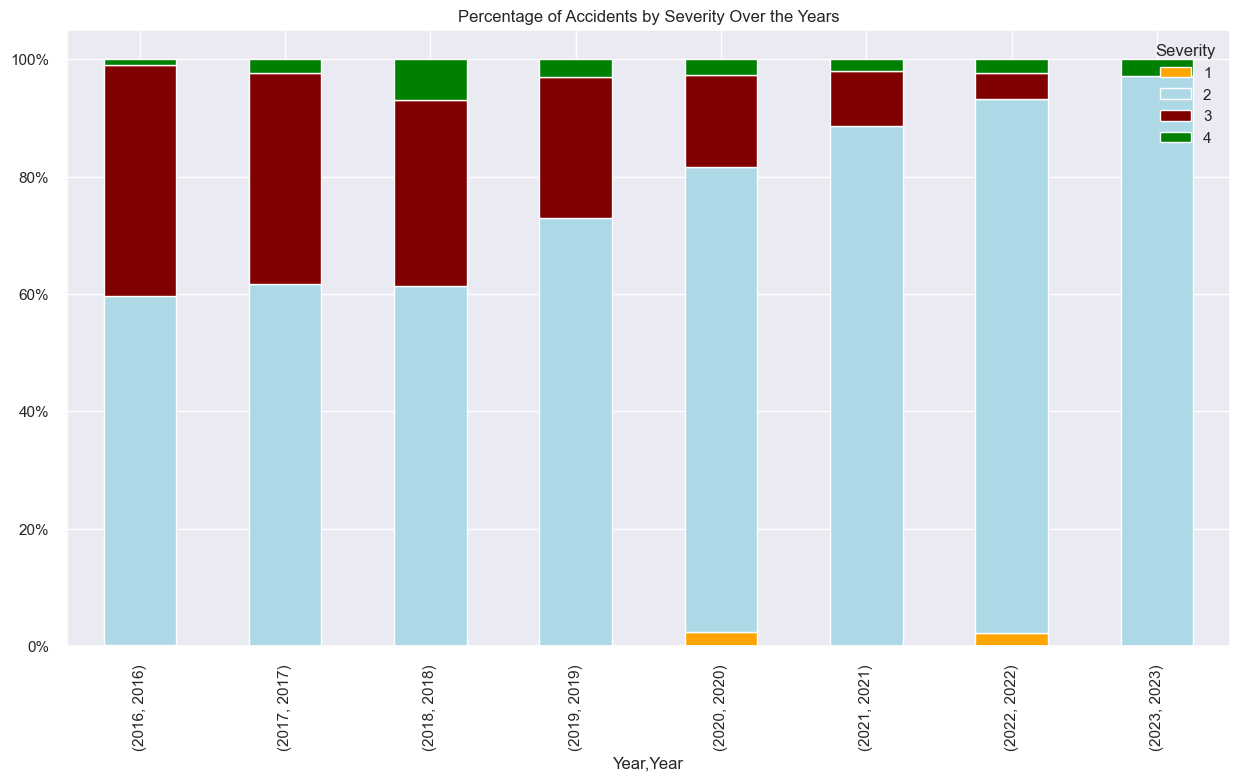

In [19]:
## Percentage of Accidents by Severity Year over Year


# Extracting year from the weather_timestamp column
restored_df['Year'] = restored_df['Weather_Timestamp'].dt.year

# Specified colors for each severity 
severity_colors = {
    1: 'orange',
    2: 'lightblue',
    3: 'maroon',
    4: 'green'
}

# Specify the order of severity levels
severity_order = [1, 2, 3, 4]

# Grouping by Year and Severity, calculate the percentage, and create a stacked bar plot
(restored_df.groupby(["Year", "Severity"])
            .size()
            .groupby(level=0)
            .apply(lambda x: 100 * x / x.sum())
            .unstack()
            .loc[:, severity_order]  # Specify the order of severity levels
            .plot(kind='bar', stacked=True, color=[severity_colors[col] for col in severity_order]))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc='upper right', title='Severity')
plt.title('Percentage of Accidents by Severity Over the Years')
plt.show()

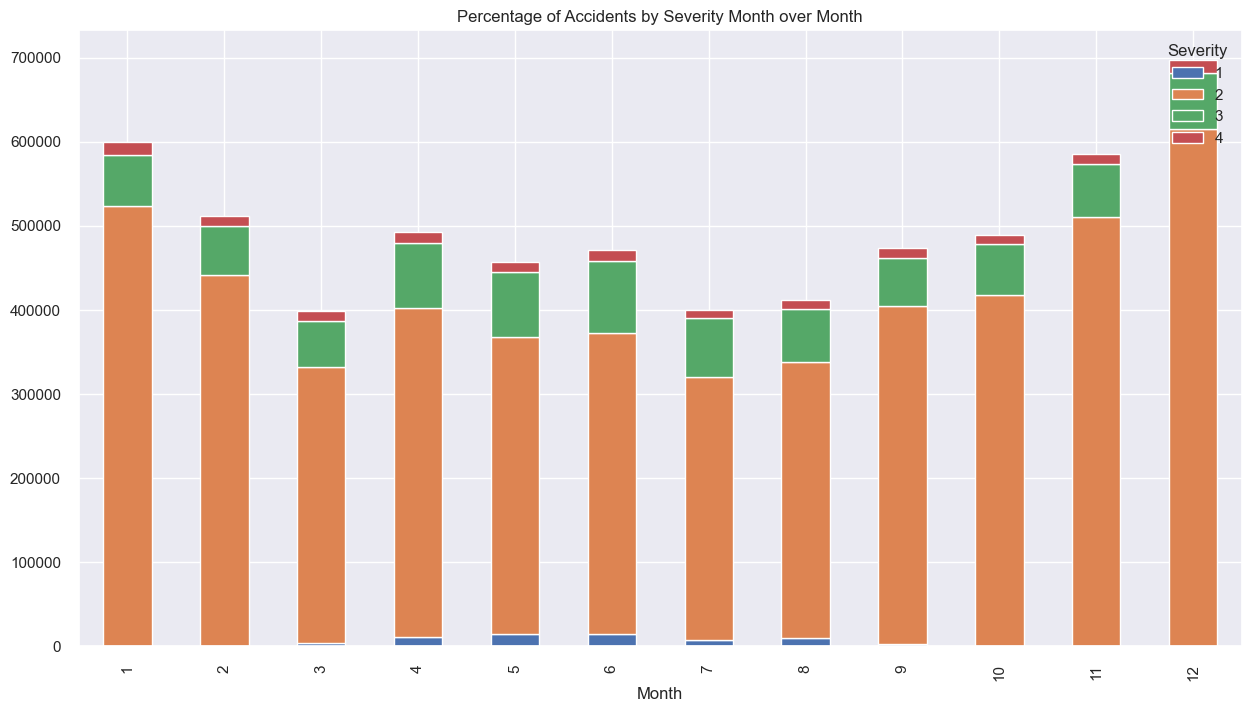

In [20]:
## Percentage of Accidents by Severity Month over Month

restored_df.groupby(["Month","Severity"]).size().unstack().plot(kind='bar',stacked=True)
plt.legend(loc='upper right', title='Severity')
plt.title('Percentage of Accidents by Severity Month over Month')
plt.show()

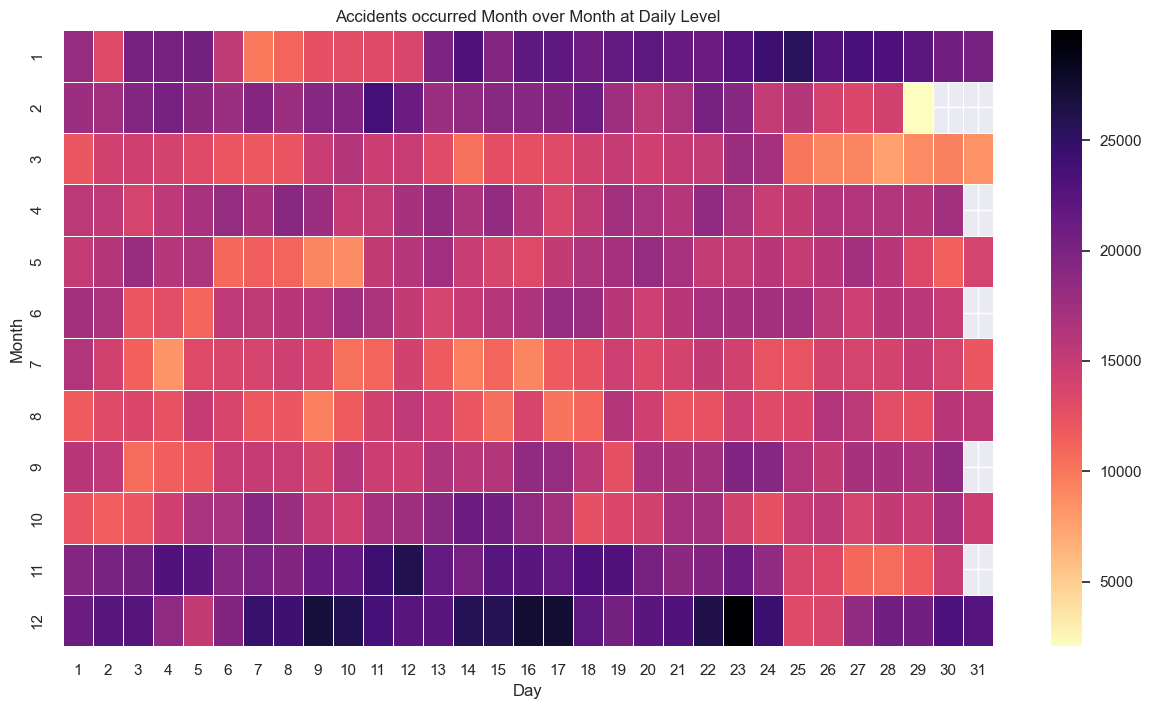

In [21]:
## Percentage of Accidents at Daily Level Month over Month using HeatMaps 
## This will help us identify on which all days and months the most accidents have occurred 
## As per the below graph, it says Nov, Dec, and Jan months have the most accidents. 


group_day = restored_df.groupby(["Month","Day"]).size().unstack()
ax = sns.heatmap(group_day, cmap="magma_r",linewidths=0.4)
plt.title('Accidents occurred Month over Month at Daily Level')
plt.show()

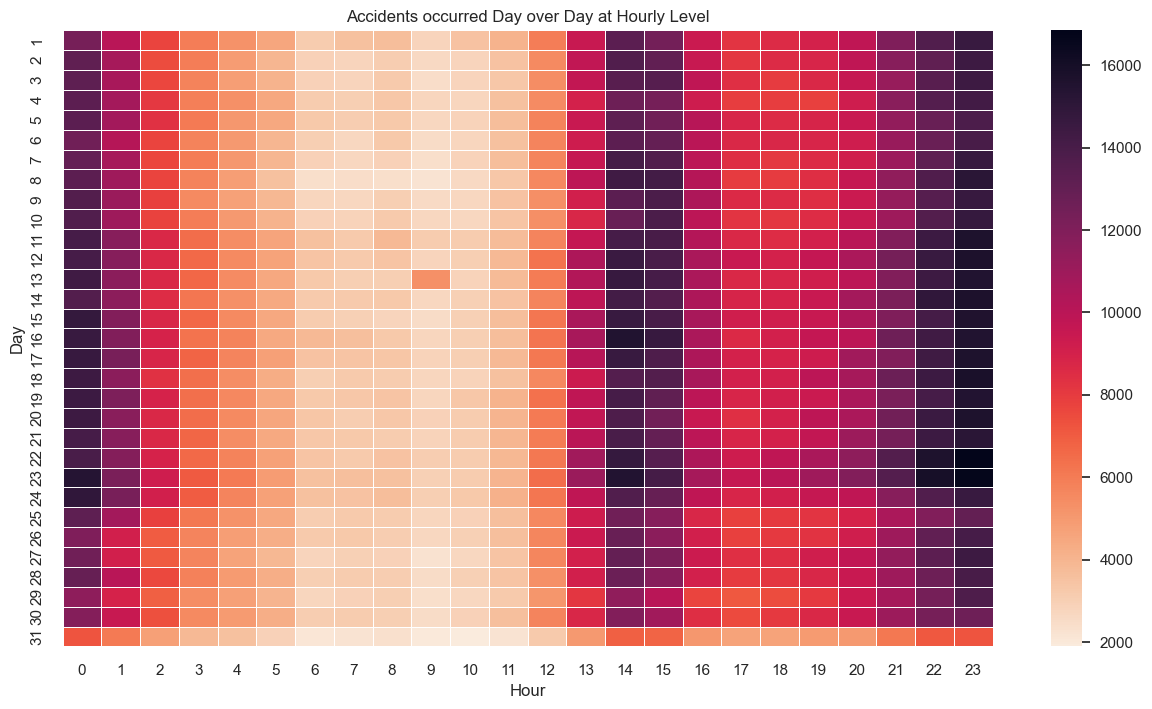

In [22]:
## Percentage of Accidents at Hourly Level Day over Day using HeatMaps 
## This will help us identify on which all days during which hours the most accidents have occurred 
## As per the below graph, its observed that most of the accidents have occurred during the night and afternoon during rush hours.

group_day = restored_df.groupby(["Day","Hour"]).size().unstack()
ax = sns.heatmap(group_day, cmap="rocket_r",linewidths=0.4)
plt.title('Accidents occurred Day over Day at Hourly Level')
plt.show()

# GEO SPATIAL VISUALIZATION 

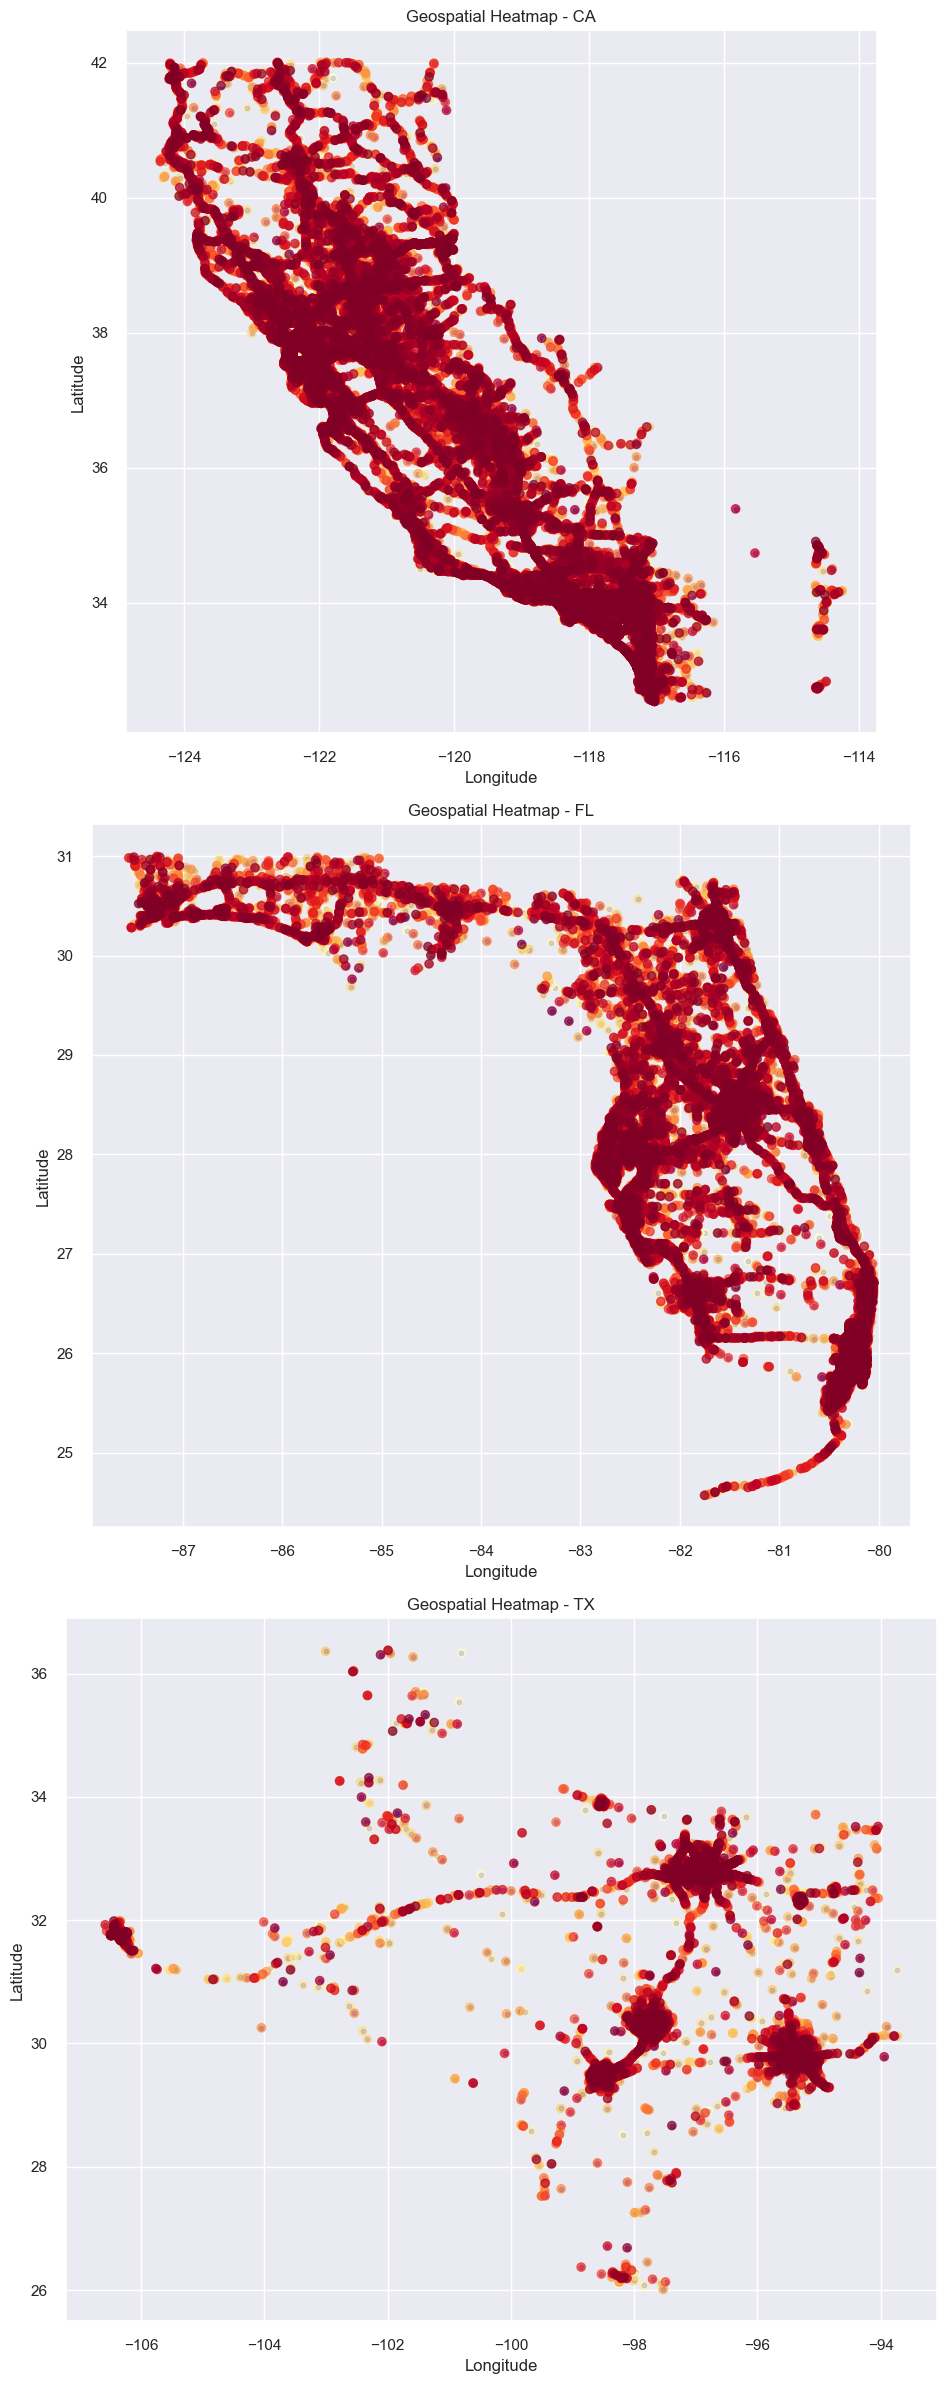

In [23]:
## For top 3 states only 

import geopandas as gpd
import matplotlib.pyplot as plt

# Sampling the data for better performance
sampled_df = restored_df.sample(frac=0.2)

## Top 3 states based on the total count of accidents.
top_states = sampled_df['State'].value_counts().nlargest(3).index

# Creating separate geospatial heatmaps for each of the top 3 states
fig, axes = plt.subplots(nrows=3, figsize=(12, 24))

for i, state in enumerate(top_states):
    state_df = sampled_df[sampled_df['State'] == state]
    
    # Creating a GeoDataFrame from the DataFrame with the latitude and longitude information
    geometry = gpd.points_from_xy(state_df['Start_Lng'], state_df['Start_Lat'])
    gdf = gpd.GeoDataFrame(state_df, geometry=geometry)
    
    # Creating geospatial heatmap using a Kernel Density Estimation (KDE)
    gdf.plot(ax=axes[i], alpha=0.5, markersize=10, color='blue')  
    gdf.plot(ax=axes[i], cmap='YlOrRd', alpha=0.7, column=None, legend=True)

    axes[i].set_title(f'Geospatial Heatmap - {state}')
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')

plt.tight_layout()
plt.show()


In [ ]:
## For all states except top 3 

# Sampling the data for better performance
sampled_df = restored_df.sample(frac=0.2)

# Top 3 states based on the total count of accidents
top_states = sampled_df['State'].value_counts().nlargest(3).index

# Creating separate geospatial heatmaps for the top 3 states and all other states
fig, axes = plt.subplots(nrows=2, figsize=(12, 18))

# Create a GeoDataFrame for all other states
other_states_df = sampled_df[~sampled_df['State'].isin(top_states)]
other_geometry = gpd.points_from_xy(other_states_df['Start_Lng'], other_states_df['Start_Lat'])
other_gdf = gpd.GeoDataFrame(other_states_df, geometry=other_geometry)

# Create a geospatial heatmap
other_gdf.plot(ax=axes[0], cmap='YlOrRd', alpha=0.7, column=None, legend=True)  

axes[0].set_title('Geospatial Heatmap - All States Except Top 3')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

plt.tight_layout()
plt.show()


In [ ]:
## For all states geospatial heatmap

sampled_df = restored_df.sample(frac=0.2)

# Get the top 3 states based on the total count of accidents
top_states = sampled_df['State'].value_counts().nlargest(3).index

# Creating a GeoDataFrame for all states
all_states_df = sampled_df.copy()
all_geometry = gpd.points_from_xy(all_states_df['Start_Lng'], all_states_df['Start_Lat'])
all_gdf = gpd.GeoDataFrame(all_states_df, geometry=all_geometry)

# Creating a geospatial heatmap for all states
fig, axes = plt.subplots(nrows=2, figsize=(12, 18))

# Heatmap 
all_gdf.plot(ax=axes[0], cmap='YlOrRd', alpha=0.7, column=None, legend=True)
axes[0].set_title('Geospatial Heatmap - All States')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

plt.tight_layout()
plt.show()


# Machine Learning Algorithms Results Visualization 

In [5]:

## Results for Random Forest 
Accuracy= 0.8304724857050503
Precision = 0.689684549513125
Recall = 0.8304724857050503
F1_Score = 0.753559045436814


# Results for Gradient Boosting
gb_rmse = 0.4396706244547194
gb_mae = 0.2808252008305418

# Results for Linear Regression
lr_rmse = 0.45739843221894366
lr_mae = 0.3048981814782332


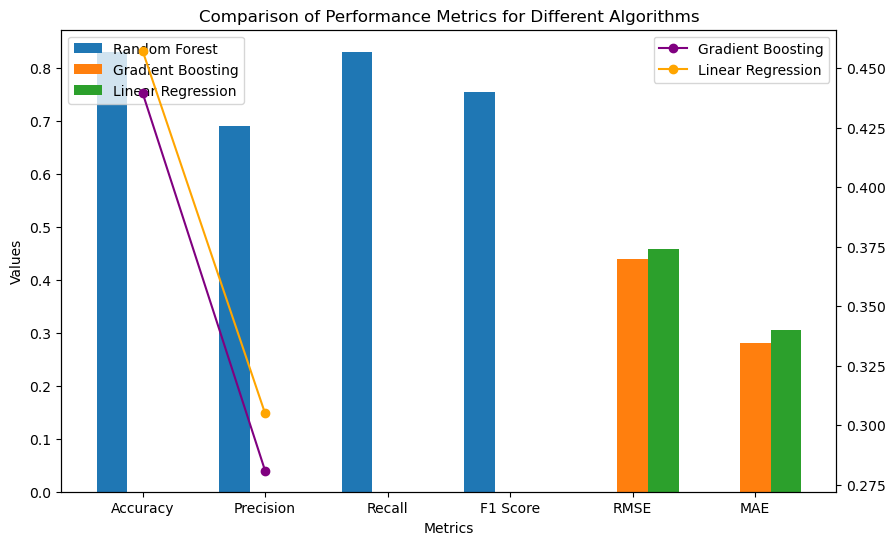

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Results for Random Forest
rf_accuracy = 0.8304724857050503
rf_precision = 0.689684549513125
rf_recall = 0.8304724857050503
rf_f1_score = 0.753559045436814

# Results for Gradient Boosting
gb_rmse = 0.4396706244547194
gb_mae = 0.2808252008305418

# Results for Linear Regression
lr_rmse = 0.45739843221894366
lr_mae = 0.3048981814782332

# Labels
algorithms = ['Random Forest', 'Gradient Boosting', 'Linear Regression']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'RMSE', 'MAE']

# Values for metrics
rf_metrics_values = [rf_accuracy, rf_precision, rf_recall, rf_f1_score, np.nan, np.nan]
gb_metrics_values = [np.nan, np.nan, np.nan, np.nan, gb_rmse, gb_mae]
lr_metrics_values = [np.nan, np.nan, np.nan, np.nan, lr_rmse, lr_mae]
bar_width = 0.25
index = np.arange(len(metrics))

# Creating grouped bar plots
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index - bar_width, rf_metrics_values, bar_width, label='Random Forest')
bar2 = ax.bar(index, gb_metrics_values, bar_width, label='Gradient Boosting')
bar3 = ax.bar(index + bar_width, lr_metrics_values, bar_width, label='Linear Regression')

# Creating a line chart for RMSE and MAE
ax2 = ax.twinx()
ax2.plot(algorithms[1:], [gb_rmse, gb_mae], marker='o', linestyle='-', color='purple', label='Gradient Boosting')
ax2.plot(algorithms[1:], [lr_rmse, lr_mae], marker='o', linestyle='-', color='orange', label='Linear Regression')

# Customize the plot
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Performance Metrics for Different Algorithms')
ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()
